In [1]:
import numpy as np
import astropy as ap
from astropy import units as u
import matplotlib.pyplot as plt
import ugradio
import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
vv = np.load('Sun_data_last.npz')['vv']
tt = np.load('Sun_data_last.npz')['ttt']

jdt = (ugradio.timing.julian_date(tt) - ugradio.timing.julian_date(tt)[0])*24
vvMean = np.mean(vv)
vv = vv - vvMean
vv = vv[:-3000]
jdt = jdt[:-3000]

In [9]:
tt = np.load('Sun_data_last.npz')['ttt']
print(tt[1] - tt[0])
print(tt[2] - tt[1])
print(tt[3] - tt[2])
print(tt[4] - tt[3])
print(tt[5] - tt[4])

0.313627958298
0.185507059097
0.0627558231354
0.437591075897
0.0694029331207


In [4]:
tt = np.load('Sun_data_last.npz')['ttt']
print (tt - tt[0])[-1]/60/60
print(len(tt)/120./120.)
tt = tt[:-3000]
print(len(tt)/120./120)
rect = tt - tt[0]
print(rect[-1]/60/60)

10.4632940347
10.3477777778
10.1394444444
10.1393226067


In [12]:
len(tt)

146008

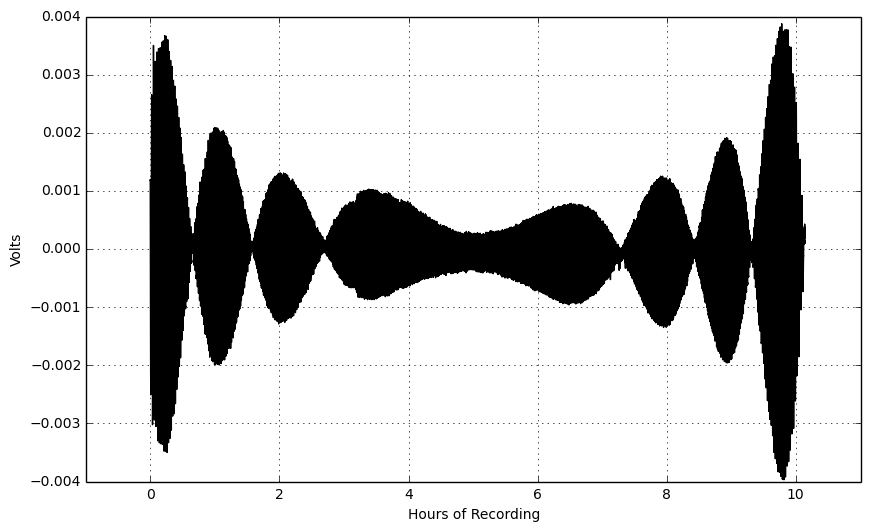

In [43]:
plt.figure(figsize = (10,6))
plt.plot(jdt, vv, 'k')
plt.xlim(-1,11)
plt.grid()
plt.xlabel('Hours of Recording')
plt.ylabel('Volts')

# FFT power etc..

In [47]:
def powerSplit(dVV, dTT, minD):
    row = 120*minD
    col = len(dVV)/(row)
    rm = len(dVV)%(row)
    dVV = dVV[:-rm]
    dTT = dTT[:-rm]
    dvv = dVV.reshape(row, col)
    PR = np.zeros((row, col))
    for i in range(row):
        pr = np.fft.fftshift(abs(np.fft.fft(dvv[i]))**2)
        PR[i] = pr
    return PR

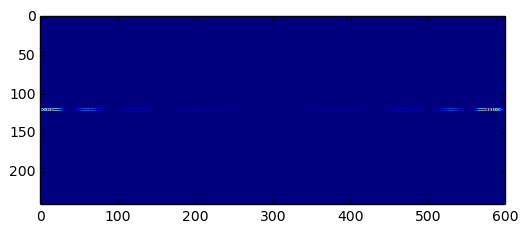

In [58]:
pr = powerSplit(vv, tt,5)
plt.imshow(pr.T)
# plt.ylim(100,150)

(-0.05, 0.05)

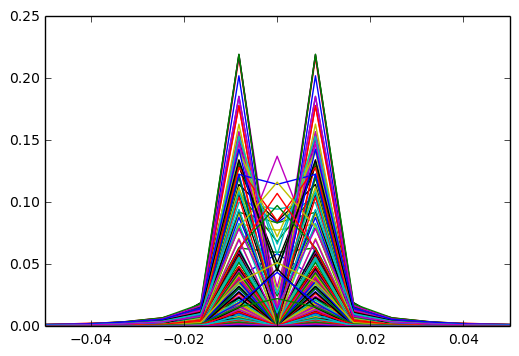

In [56]:
for i in range(len(pr[:,0])):
    freq = np.fft.fftshift(np.fft.fftfreq(len(pr[i]), d = 0.5))
    plt.plot(freq, pr[i])
plt.xlim(-0.05, 0.05)

(-0.02, 0.02)

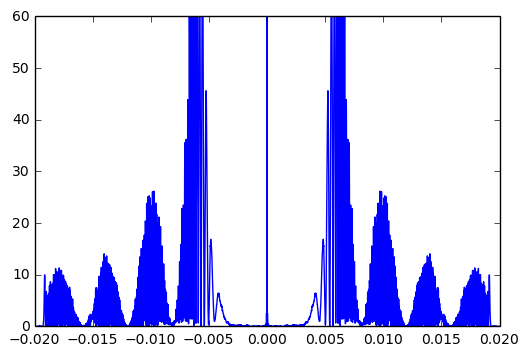

In [82]:

ff = np.fft.fft(vv)
power = np.fft.fftshift(abs(ff)**2)
freq = np.fft.fftshift(np.fft.fftfreq(len(tt), d = 0.5))
plt.plot(freq,power)
plt.ylim(0,60)
plt.xlim(-0.02, 0.02)

In [10]:
vvC = np.load('Cas_data_last.npz')['vv']
ttC = np.load('Cas_data_last.npz')['ttt']
vvCMean = np.mean(vvC)

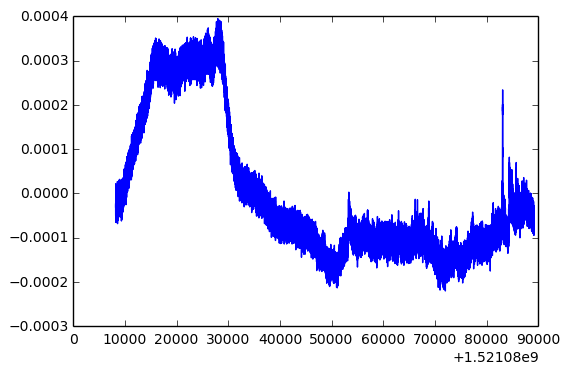

In [11]:
plt.plot(ttC, vvC - vvCMean)